### Linear Regression

The linear regression model tries to find linear function that minimizes the error of estimation vs. real data.
The error, also known as residuals are shown in red

![Linear Regression Errors](imgs/regerrors.jpg)
 
 
it has the form

$$  f(X) = \beta_0 + \sum X_j\beta_j  $$

The most popular estimation method for $\beta$ is the _least squares_ method, in which the coefficients $\beta$ minimize the Residual Sum of Squares (RSS)

$$ RSS(\beta) = \sum (y_i - f(x_i))^2 = \sum (y_i - \beta_0 - \sum x_{ij}\beta_j)^2 $$

At this point, we will assume that the columns of our data X are linearly independent, therefore we can obtain $\beta$

$$ \hat{\beta} = (\bf{X}^T\bf{X})^{-1} \bf{X}^t\bf{y}$$

and $y$ as

$$ \hat{y} = \bf{X}\hat{\beta} $$

In [2]:
import numpy as np

def linear_regression(X, y):
    """ 
    Fits the data into a linear function
    
    Parameters
    ----------
    X: array_like
        Data containing the dependent variables
    
    y: array_like
        1-D array with the response variable

    Returns
    -------
    
    betas: Series
        ndarray containing the coefficients of the linear function
        
    
    Example
    -------

    """
    # insert the column of 1s to find the linear intercept (beta 0)
    X = np.vstack([np.ones(len(X)), X]).T
    
    XT         = np.transpose(X)
    XTX        = np.dot(XT, X)
    XTX_inv    = np.linalg.inv(XTX)
    XTX_inv_XT = np.dot(XTX_inv, XT)
    beta       = np.dot(XTX_inv_XT, y)
    
    return beta


In [3]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 1, 3, 4, 3, 6, 4, 6, 7])

beta = linear_regression(X, y)
beta

array([0.75, 0.65])

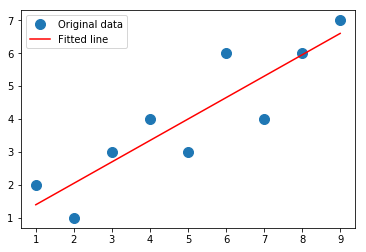

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, y, 'o', label='Original data', markersize=10)
plt.plot(X, beta[0] + beta[1]*X, 'r', label='Fitted line')
plt.legend()
plt.show()

In [5]:
import sys
sys.path.append('../data_generator/')
from data_generator import bivariable_polinomial

In [6]:
X, y = bivariable_polinomial([3, 4], sample_size=100, x0=0, xmax=100, mu=0, sigma=10.0)

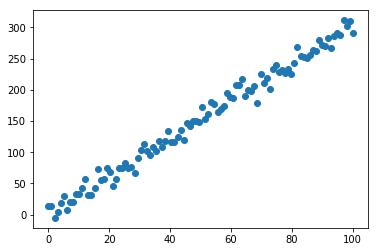

In [7]:
plt.plot(X, y, "o")

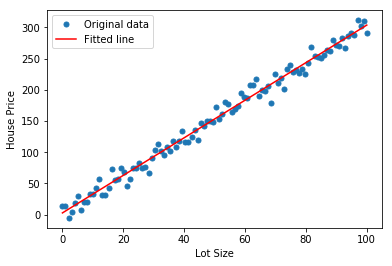

In [9]:
beta = linear_regression(X, y)
fig = plt.figure()
plt.plot(X, y, 'o', label='Original data', markersize=5)
plt.plot(X, beta[0] + beta[1]*X, 'r', label='Fitted line')
plt.xlabel('Lot Size')
plt.ylabel('House Price')
fig.savefig('house_price_graph_with_line.png')
plt.legend()
plt.show()